In [ ]:
from google.colab import drive
drive.mount('/gdrive')
#Change current working directory to gdrive
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9016 sha256=e39988574d4c0188474d9f57ab38016584f2085866824c2027f6e1366c928baa
  Stored in directory: /root/.cache/pip/wheels/6d/4e/9e/a95c14a232a196c22d9c04b221ff5d25461a1a4c55339c61db
Successfully built minisom


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
# Calculate silhouette_score
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# **Problem 1**

In [ ]:
#Read files
trainfile = r'/gdrive/MyDrive/CC GENERAL.csv'
trainData = pd.read_csv(trainfile) #creates a dataframe

print(trainData.shape)

(8950, 18)


In [ ]:
trainData.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
trainData.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
trainData.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
trainData['MINIMUM_PAYMENTS'].fillna(0,inplace=True)

In [ ]:
trainData['CREDIT_LIMIT'].fillna(trainData['CREDIT_LIMIT'].min(),inplace=True)

In [ ]:
trainData.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

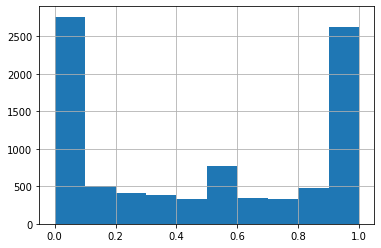

In [ ]:
trainData['PURCHASES_FREQUENCY'].hist()

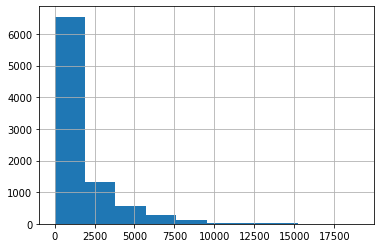

In [ ]:
trainData['BALANCE'].hist()

In [ ]:
cust_id = trainData[['CUST_ID']]

In [ ]:
trainData.drop('CUST_ID', inplace=True, axis=1)

In [ ]:
#K-Means Clustering ========================================================================
#Silouette score
clusters = [2,3,4,5,7,9]

for i in clusters:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(trainData)
  # print(kmeans.labels_)
  # print(kmeans.cluster_centers_)
  #Print Silhouette measure
  print("number of clusters = ",i)
  print("silhouette_score = ", silhouette_score(trainData, kmeans.labels_))
  # print(trainData_wo_pf.shape)

number of clusters =  2
silhouette_score =  0.5116611103435498
number of clusters =  3
silhouette_score =  0.4655597581293068
number of clusters =  4
silhouette_score =  0.39849924886121696
number of clusters =  5
silhouette_score =  0.3795348921494996
number of clusters =  7
silhouette_score =  0.3703256028522122
number of clusters =  9
silhouette_score =  0.35159074272222834


In [ ]:
#K-Means Clustering ========================================================================
clusters = [2,3,4,5,7,9]

for i in clusters:
  kmeans = KMeans(n_clusters=i, max_iter=1000, n_init=50)
  kmeans.fit(trainData)
  # print(kmeans.labels_)
  # print(kmeans.cluster_centers_)
  #Print Silhouette measure
  print("number of clusters = ",i)
  print("silhouette_score = ", silhouette_score(trainData, kmeans.labels_))
  # print(trainData_wo_pf.shape)

number of clusters =  2
silhouette_score =  0.5118157805867898
number of clusters =  3
silhouette_score =  0.46602231334934974
number of clusters =  4
silhouette_score =  0.46578184328954964
number of clusters =  5
silhouette_score =  0.3982124733488468
number of clusters =  7
silhouette_score =  0.3704103647013321
number of clusters =  9
silhouette_score =  0.35337090495223017


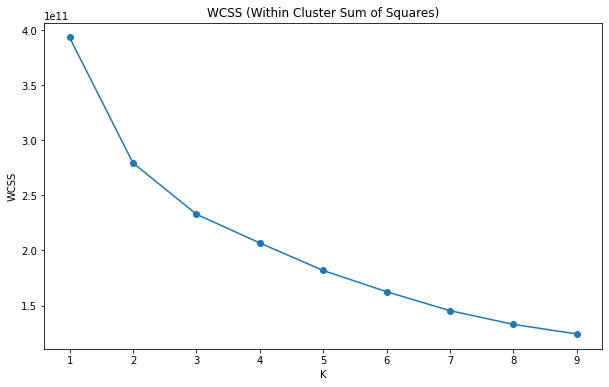

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(trainData)
    wcss.append(kmeans.inertia_)
    
    import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.title('WCSS (Within Cluster Sum of Squares)')
plt.plot(range(1,10),wcss, marker='o')
plt.xticks(range(1,10))
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

In [ ]:
trainData_1 = trainData.copy()

In [ ]:
#Add Cluster Number to each datapoint + save file

kmeans = KMeans(n_clusters=2)
kmeans.fit(trainData)
kmeans_predict_train=kmeans.predict(trainData)
print(kmeans_predict_train)

trainData_1['Cluster_k_2']=kmeans.labels_
print(trainData_1.shape)
# print(data_pf_3_kmeans.shape)
trainData_1.head()

[1 0 1 ... 1 1 1]
(8950, 18)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster_k_2
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


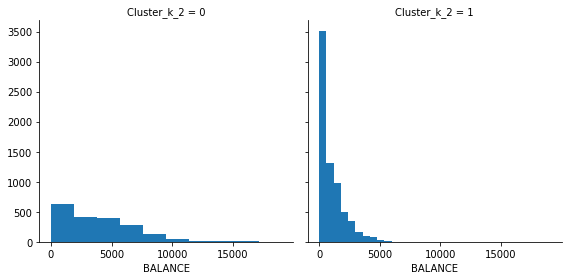

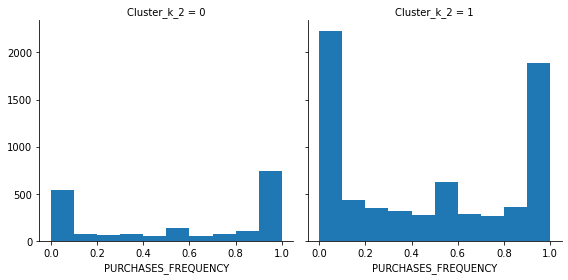

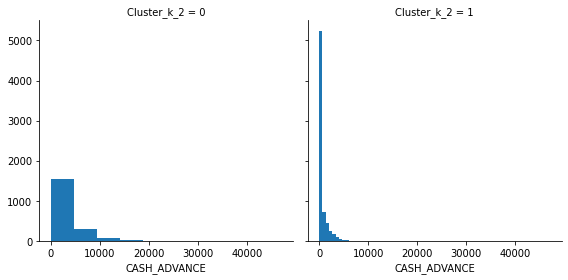

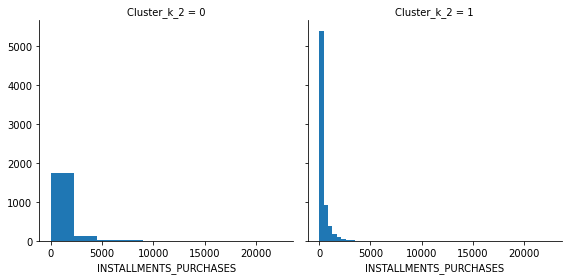

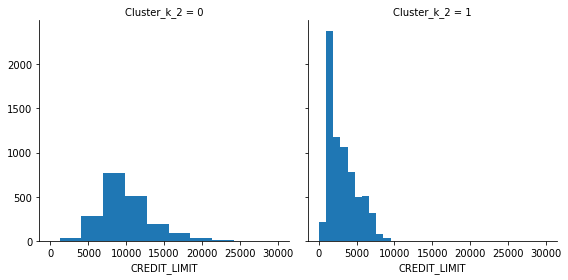

In [ ]:
import seaborn as sns

trainData_1_viz = trainData_1[['BALANCE','PURCHASES_FREQUENCY','CASH_ADVANCE','INSTALLMENTS_PURCHASES','CREDIT_LIMIT','Cluster_k_2']]

for c in trainData_1_viz.iloc[:,:-1]:
    grid= sns.FacetGrid(trainData_1_viz, col='Cluster_k_2', height=4)
    grid.map(plt.hist, c)

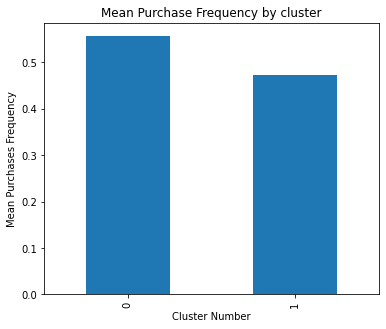

In [ ]:
dfg = trainData_1_viz.groupby('Cluster_k_2')['PURCHASES_FREQUENCY'].mean()

dfg.plot(kind='bar', title='Mean Purchase Frequency by cluster', ylabel='Mean Purchases Frequency',
         xlabel='Cluster Number', figsize=(6, 5))

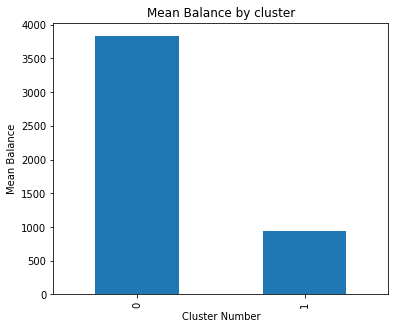

In [ ]:
dfg = trainData_1_viz.groupby('Cluster_k_2')['BALANCE'].mean()

dfg.plot(kind='bar', title='Mean Balance by cluster', ylabel='Mean Balance',
         xlabel='Cluster Number', figsize=(6, 5))

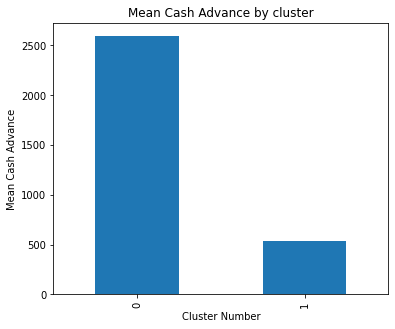

In [ ]:
dfg = trainData_1_viz.groupby('Cluster_k_2')['CASH_ADVANCE'].mean()

dfg.plot(kind='bar', title='Mean Cash Advance by cluster', ylabel='Mean Cash Advance',
         xlabel='Cluster Number', figsize=(6, 5))

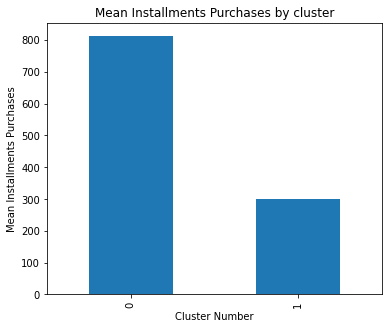

In [ ]:
dfg = trainData_1_viz.groupby('Cluster_k_2')['INSTALLMENTS_PURCHASES'].mean()

dfg.plot(kind='bar', title='Mean Installments Purchases by cluster', ylabel='Mean Installments Purchases',
         xlabel='Cluster Number', figsize=(6, 5))

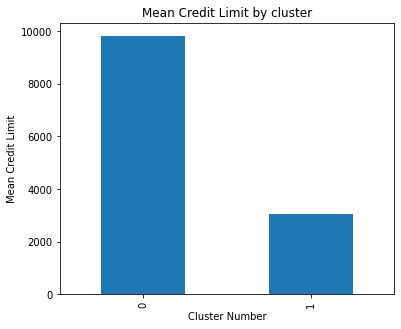

In [ ]:
dfg = trainData_1_viz.groupby('Cluster_k_2')['CREDIT_LIMIT'].mean()

dfg.plot(kind='bar', title='Mean Credit Limit by cluster', ylabel='Mean Credit Limit',
         xlabel='Cluster Number', figsize=(6, 5))

In [ ]:
#Add Cluster Number to each datapoint + save file

kmeans = KMeans(n_clusters=3)
kmeans.fit(trainData)
kmeans_predict_train=kmeans.predict(trainData)
print(kmeans_predict_train)

trainData_1['Cluster_k_3']=kmeans.labels_
print(trainData_1.shape)
# print(data_pf_3_kmeans.shape)
trainData_1.head()

[1 2 2 ... 1 1 1]
(8950, 19)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster_k_2,Cluster_k_3
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,1,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1,1


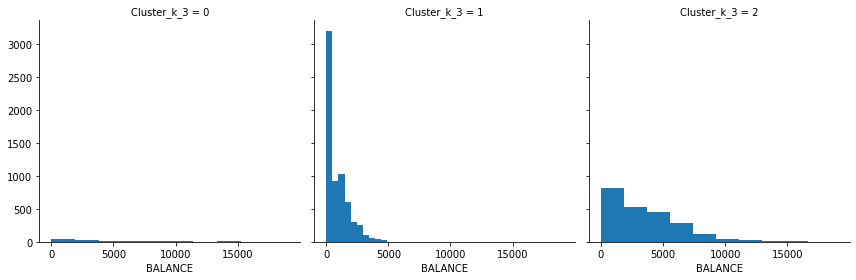

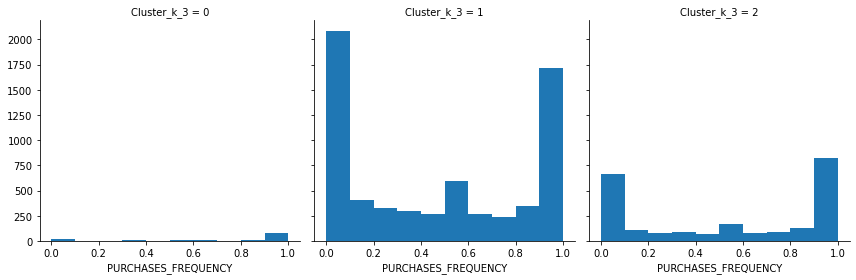

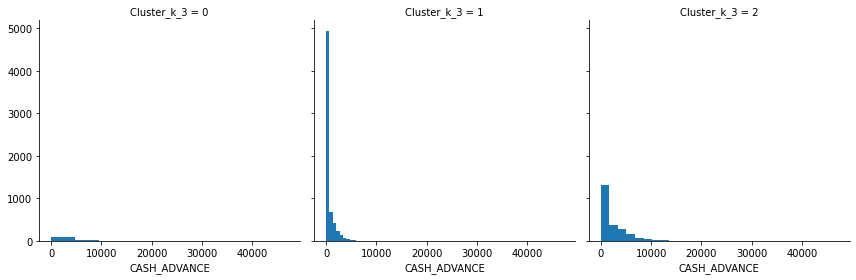

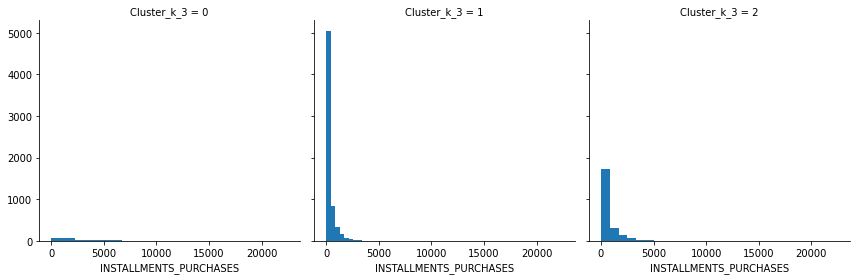

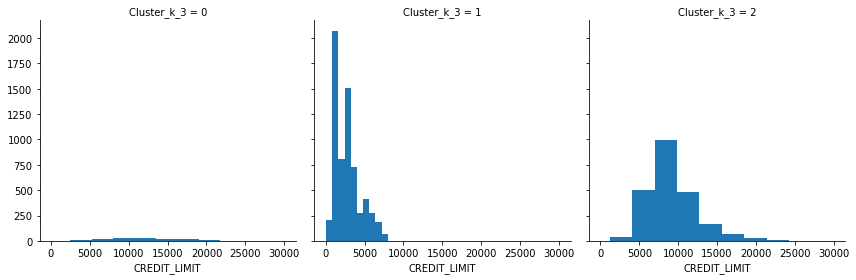

In [ ]:
import seaborn as sns

trainData_1_viz = trainData_1[['BALANCE','PURCHASES_FREQUENCY','CASH_ADVANCE','INSTALLMENTS_PURCHASES','CREDIT_LIMIT','Cluster_k_3']]

for c in trainData_1_viz.iloc[:,:-1]:
    grid= sns.FacetGrid(trainData_1_viz, col='Cluster_k_3', height=4)
    grid.map(plt.hist, c)

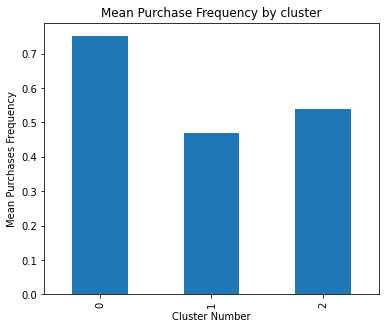

In [ ]:
dfg = trainData_1_viz.groupby('Cluster_k_3')['PURCHASES_FREQUENCY'].mean()

dfg.plot(kind='bar', title='Mean Purchase Frequency by cluster', ylabel='Mean Purchases Frequency',
         xlabel='Cluster Number', figsize=(6, 5))

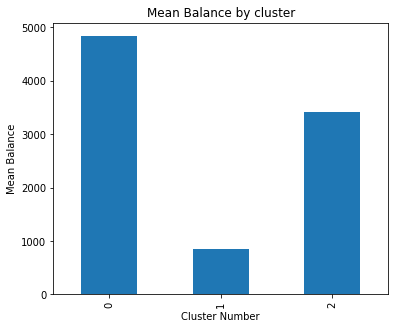

In [ ]:
dfg = trainData_1_viz.groupby('Cluster_k_3')['BALANCE'].mean()

dfg.plot(kind='bar', title='Mean Balance by cluster', ylabel='Mean Balance',
         xlabel='Cluster Number', figsize=(6, 5))

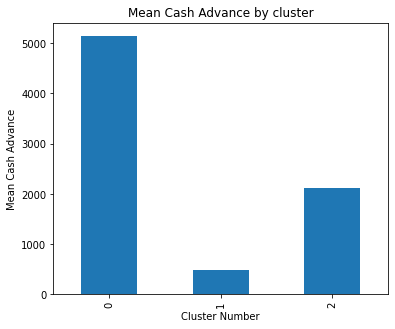

In [ ]:
dfg = trainData_1_viz.groupby('Cluster_k_3')['CASH_ADVANCE'].mean()

dfg.plot(kind='bar', title='Mean Cash Advance by cluster', ylabel='Mean Cash Advance',
         xlabel='Cluster Number', figsize=(6, 5))

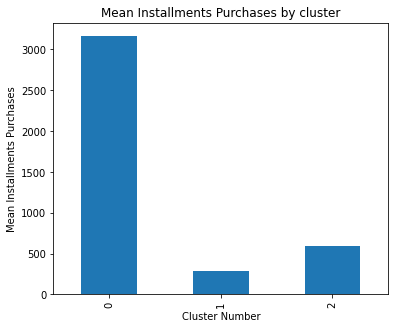

In [ ]:
dfg = trainData_1_viz.groupby('Cluster_k_3')['INSTALLMENTS_PURCHASES'].mean()

dfg.plot(kind='bar', title='Mean Installments Purchases by cluster', ylabel='Mean Installments Purchases',
         xlabel='Cluster Number', figsize=(6, 5))

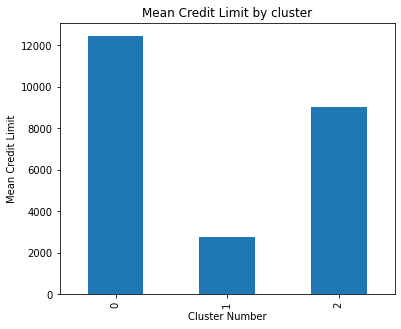

In [ ]:
dfg = trainData_1_viz.groupby('Cluster_k_3')['CREDIT_LIMIT'].mean()

dfg.plot(kind='bar', title='Mean Credit Limit by cluster', ylabel='Mean Credit Limit',
         xlabel='Cluster Number', figsize=(6, 5))

# **Problem 2**

In [ ]:
#Read files
file_ = r'/gdrive/MyDrive/SouthGermanCredit.xlsx'
Data = pd.read_excel(file_) #creates a dataframe

print(Data.shape)
pd.set_option('display.max_columns', None)
Data.head()

(1000, 21)


,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,1


In [ ]:
Data.describe()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


In [ ]:
Data.isna().sum()

laufkont    0
laufzeit    0
moral       0
verw        0
hoehe       0
sparkont    0
beszeit     0
rate        0
famges      0
buerge      0
wohnzeit    0
verm        0
alter       0
weitkred    0
wohn        0
bishkred    0
beruf       0
pers        0
telef       0
gastarb     0
kredit      0
dtype: int64

In [ ]:
kredit = Data['kredit'].copy()

In [ ]:
kredit.value_counts()

1    700
0    300
Name: kredit, dtype: int64

In [ ]:
Data.drop(['kredit'], axis = 1, inplace = True)

In [ ]:
#K-Means Clustering ========================================================================
clusters = [2,3,5,7,9,10]

for i in clusters:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(Data)
  # print(kmeans.labels_)
  # print(kmeans.cluster_centers_)
  #Print Silhouette measure
  print("number of clusters = ",i)
  print("silhouette_score = ", silhouette_score(Data, kmeans.labels_))
  # print(trainData_wo_pf.shape)

number of clusters =  2
silhouette_score =  0.7222312904192741
number of clusters =  3
silhouette_score =  0.6478558590708904
number of clusters =  5
silhouette_score =  0.5830543329139497
number of clusters =  7
silhouette_score =  0.5776551021000933
number of clusters =  9
silhouette_score =  0.5770409838748931
number of clusters =  10
silhouette_score =  0.5462041753101368


In [ ]:
#K-Means Clustering ========================================================================
clusters = [2,3,5,7,9,10]

for i in clusters:
  kmeans = KMeans(n_clusters=i, max_iter=1000, n_init=50)
  kmeans.fit(Data)
  # print(kmeans.labels_)
  # print(kmeans.cluster_centers_)
  #Print Silhouette measure
  print("number of clusters = ",i)
  print("silhouette_score = ", silhouette_score(Data, kmeans.labels_))
  # print(trainData_wo_pf.shape)

number of clusters =  2
silhouette_score =  0.7222312904192741
number of clusters =  3
silhouette_score =  0.6478558590708904
number of clusters =  5
silhouette_score =  0.5819174231080936
number of clusters =  7
silhouette_score =  0.5776551021000933
number of clusters =  9
silhouette_score =  0.5763530732662037
number of clusters =  10
silhouette_score =  0.5509226206468659


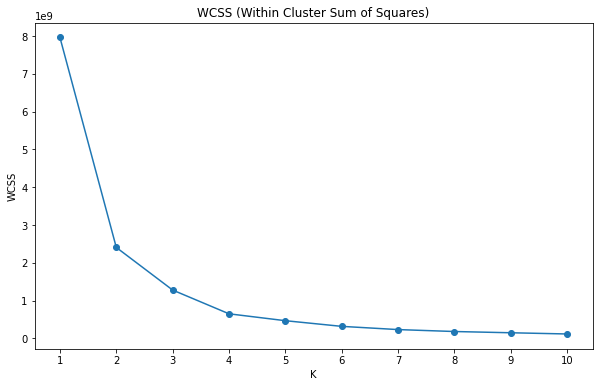

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(Data)
    wcss.append(kmeans.inertia_)
    
    import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.title('WCSS (Within Cluster Sum of Squares)')
plt.plot(range(1,11),wcss, marker='o')
plt.xticks(range(1,11))
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Add Cluster Number to each datapoint + save file

kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(Data)
kmeans_predict_train=kmeans.predict(Data)
# print(kmeans_predict_train)

Data['Cluster_k_8']=kmeans.labels_
print(Data.shape)
# print(data_pf_3_kmeans.shape)
Data.head()

(1000, 21)


,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,Cluster_k_8
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,0
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,4
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,0
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,4
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,4


In [ ]:
Data['Cluster_k_8'].value_counts()

0    358
4    241
3    160
7     75
1     71
6     53
2     29
5     13
Name: Cluster_k_8, dtype: int64

In [ ]:
data_1 = pd.concat([Data,kredit], axis=1)
print(data_1.shape)
data_1.head()

(1000, 22)


,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,Cluster_k_8,kredit
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,0,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,4,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,0,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,4,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,4,1


In [ ]:
data_1.groupby(['Cluster_k_8','kredit'])['kredit'].count()

Cluster_k_8  kredit
0            0          99
             1         259
1            0          26
             1          45
2            0          16
             1          13
3            0          34
             1         126
4            0          64
             1         177
5            0           9
             1           4
6            0          21
             1          32
7            0          31
             1          44
Name: kredit, dtype: int64

clusters 2 and 5 predict majority bad credits. Hence assigning the records present in these clusters as bad credits

In [ ]:
data_1['prediction'] = data_1['Cluster_k_8'].apply(lambda x: 0 if x == 2 else (0 if x==5 else 1))

In [ ]:
data_1.head(2)

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,Cluster_k_8,kredit,prediction
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,0,1,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,4,1,1


In [ ]:
cluster_pred_good = data_1.loc[data_1['prediction']==1]
cluster_pred_bad = data_1.loc[data_1['prediction']==0]

In [ ]:
#percentage of good and bad credits in cluster prediction 0
good_0 = sum(cluster_pred_bad['kredit'])/len(cluster_pred_bad['kredit'])
print("percentage of good credits in cluster prediction 0:", round(good_0*100,2))
print("percentage of bad credits in cluster prediction 0:", round((1-good_0)*100,2))

percentage of good credits in cluster prediction 0: 40.48
percentage of bad credits in cluster prediction 0: 59.52


In [ ]:
#percentage of good and bad credits in cluster prediction 1
good_0 = sum(cluster_pred_good['kredit'])/len(cluster_pred_good['kredit'])
print("percentage of good credits in cluster prediction 1:", round(good_0*100,2))
print("percentage of bad credits in cluster prediction 1:", round((1-good_0)*100,2))

percentage of good credits in cluster prediction 1: 71.29
percentage of bad credits in cluster prediction 1: 28.71


In [ ]:
import sklearn
acc = sklearn.metrics.accuracy_score(np.array(data_1['kredit']), 
                                     np.array(data_1['prediction']))

print("accuracy percentage: ",round(acc*100,2))

accuracy percentage:  70.8


In [ ]:
import numpy as np

def roc_curve(y_true, y_pred):

    fp = np.sum((y_pred == 1) & (y_true == 0))
    tp = np.sum((y_pred == 1) & (y_true == 1))

    fn = np.sum((y_pred == 0) & (y_true == 1))
    tn = np.sum((y_pred == 0) & (y_true == 0))

    tpr = (tp / (tp + fn))
    fpr = (fp / (fp + tn))
    fnr = (fn / (tp + fn))
    tnr = (tn / (fp + tn))
    acc = (tp+tn)/(tp+fp+fn+tn)

    print('true positive rate: ', tpr)
    print('false positive rate: ', fpr)
    print('false negative rate: ', fnr)
    print('true negative rate: ', tnr)
    print('accuracy: ',acc)

In [ ]:
roc_curve(data_1['prediction'],data_1['kredit'])

true positive rate:  0.7129436325678496
false positive rate:  0.40476190476190477
false negative rate:  0.2870563674321503
true negative rate:  0.5952380952380952
accuracy:  0.708


In [ ]:
data_1.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,Cluster_k_8,kredit,prediction
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,0,1,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,4,1,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,0,1,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,4,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,4,1,1


laufzeit = credit duration;
hoehe = credit amount;
buerge = guarantor;
alter = age;
sparkont = savings account;
beszeit = time;
wohnzeit = living time;
beruf = job;
telef = phone

In [ ]:
data_1.groupby('prediction').describe()

laufkont                                              laufzeit  \
              count      mean       std  min  25%  50%  75%  max    count   
prediction                                                                  
0              42.0  2.428571  1.129275  1.0  2.0  2.0  4.0  4.0     42.0   
1             958.0  2.583507  1.263100  1.0  1.0  2.0  4.0  4.0    958.0   

                                                               moral  \
                 mean        std  min   25%   50%   75%   max  count   
prediction                                                             
0           40.261905  13.935495  6.0  36.0  42.0  48.0  60.0   42.0   
1           20.054280  11.238703  4.0  12.0  18.0  24.0  72.0  958.0   

                                                          verw            \
                mean       std  min  25%  50%  75%  max  count      mean   
prediction                                                                 
0           2.261905  1.210916  0.0  2.0  2.0  3.0  4.0   42.0  3.571429   
1           2.557411  1.076170  0.0  2.0  2.0  4.0  4.0  958.0  2.795407   

                                                 hoehe                \
                 std  min  25%  50%   75%   max  count          mean   
prediction                                                             
0           3.864427  0.0  0.0  2.0  8.25  10.0   42.0  12511.714286   
1           2.682795  0.0  1.0  2.0  3.00  10.0  958.0   2866.133612   

                                                                     sparkont  \
                    std     min       25%      50%      75%      max    count   
prediction                                                                      
0           2046.784549  9857.0  10896.50  12083.5  14141.0  18424.0     42.0   
1           2055.842991   250.0   1344.25   2230.0   3672.0   9629.0    958.0   

                                                         beszeit            \
                mean       std  min  25%  50%   75%  max   count      mean   
prediction                                                                   
0           2.261905  1.682906  1.0  1.0  1.0  3.75  5.0    42.0  3.428571   
1           2.098121  1.575935  1.0  1.0  1.0  3.00  5.0   958.0  3.382046   

                                                 rate                      \
                 std  min  25%  50%   75%  max  count      mean       std   
prediction                                                                  
0           1.309307  1.0  3.0  3.5  4.75  5.0   42.0  2.357143  1.143837   
1           1.204386  1.0  3.0  3.0  5.00  5.0  958.0  3.000000  1.110414   

                                      famges                                \
            min   25%  50%   75%  max  count      mean       std  min  25%   
prediction                                                                   
0           1.0  1.25  2.0  3.75  4.0   42.0  2.666667  0.570266  1.0  2.0   
1           1.0  2.00  3.0  4.00  4.0  958.0  2.682672  0.713749  1.0  2.0   

                          buerge                                               \
            50%  75%  max  count      mean       std  min  25%  50%  75%  max   
prediction                                                                      
0           3.0  3.0  3.0   42.0  1.119048  0.327770  1.0  1.0  1.0  1.0  2.0   
1           3.0  3.0  4.0  958.0  1.146138  0.483306  1.0  1.0  1.0  1.0  3.0   

           wohnzeit                                                verm  \
              count      mean       std  min  25%  50%  75%  max  count   
prediction                                                                
0              42.0  2.976190  1.047368  1.0  2.0  3.0  4.0  4.0   42.0   
1             958.0  2.839248  1.106287  1.0  2.0  3.0  4.0  4.0  958.0   

                                                        alter             \
                mean      std  min  25%  50%  75%  max  count       mean   
prediction    

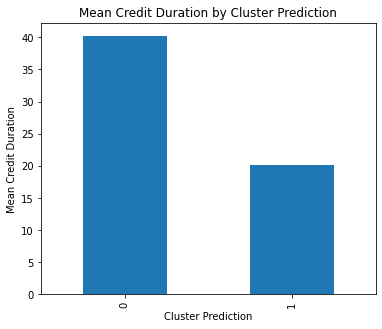

In [ ]:
dfg = data_1.groupby('prediction')['laufzeit'].mean()

dfg.plot(kind='bar', title='Mean Credit Duration by Cluster Prediction', ylabel='Mean Credit Duration',
         xlabel='Cluster Prediction', figsize=(6, 5))

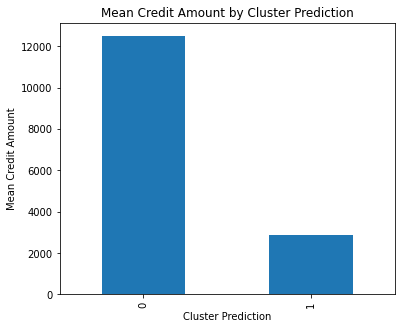

In [ ]:
dfg = data_1.groupby('prediction')['hoehe'].mean()

dfg.plot(kind='bar', title='Mean Credit Amount by Cluster Prediction', ylabel='Mean Credit Amount',
         xlabel='Cluster Prediction', figsize=(6, 5))

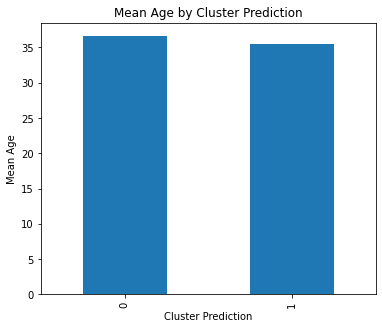

In [ ]:
dfg = data_1.groupby('prediction')['alter'].mean()

dfg.plot(kind='bar', title='Mean Age by Cluster Prediction', ylabel='Mean Age',
         xlabel='Cluster Prediction', figsize=(6, 5))